In [44]:
#Importing Neccessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
    df = pd.read_excel("C:\\Users\\SOOQ ELASER\\Documents\\RODAH CHEPKORIR- PROCTOR\DATA\\Sales.xlsx")
except FileNotFoundError:
    print("Error: The specified file was not found. Please check the file path and try again.")

In [21]:
# Data Loading--Excel formart
df=pd.read_excel("C:\\Users\\SOOQ ELASER\\Documents\\RODAH CHEPKORIR- PROCTOR\DATA\\Sales.xlsx")
df.head()

,Customer Code,Customer name,Customer Category,Sales Rep,Sales order no,Invoice no,Date,Product Code,Product,Product Category,Qty,Sales Amount,Unit,Target
0,CF0010,FAIRLANE SUPERMARKETS LTD,Supermarkets Tier 2,Samwel Onyango,SO0077943,00007402_065,2024-07-17,F10001,P&A Cornflakes 12X500G (Ctn),Breakfast Cereals,-1,-3879.40,Carton,NaN
1,CC0010,MAJID AL FUTTAIM HYPERMARKETS LIMITED,Key Accounts Customer,Samwel Onyango,SO0077977,00007425_065,2024-07-17,F10001,P&A Cornflakes 12X500G (Ctn),Breakfast Cereals,-18,-55864.08,Carton,NaN
2,CN0086,NAIVAS LTD,Key Accounts Customer,Mary Mbugua,SO0078078,00007431_065,2024-07-26,F10001,P&A Cornflakes 12X500G (Ctn),Breakfast Cereals,-4,-15517.60,Carton,NaN
3,CN0086,NAIVAS LTD,Key Accounts Customer,Mary Mbugua,SO0078079,00007432_065,2024-07-26,F10001,P&A Cornflakes 12X500G (Ctn),Breakfast Cereals,-26,-100864.40,Carton,NaN
4,CU8077,UNIQMATT SUPERMARKET LTD,Supermarket Tier3,Elizabeth Kaleli,SO0078132,00007447_065,2024-07-30,F10001,P&A Cornflakes 12X500G (Ctn),Breakfast Cereals,-1,-3879.40,Carton,NaN


### Data Exploration
##1. Data Info, Shape and data type
##2. Data description
##3. Data Cleaning: Missingg Values, Transforming date columns,checking for outliers
##4. Data Visualisation
##5.Findings
##6. Advance Analysis
##7. Categorical Data transformation


In [32]:
#1. Dataset Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10412 entries, 0 to 10411
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer Code      10412 non-null  object        
 1   Customer name      10412 non-null  object        
 2   Customer Category  10412 non-null  object        
 3   Sales Rep          10412 non-null  object        
 4   Sales order no     10412 non-null  object        
 5   Invoice no         10412 non-null  object        
 6   Date               10412 non-null  datetime64[ns]
 7   Product Code       10412 non-null  object        
 8   Product            10412 non-null  object        
 9   Product Category   10412 non-null  object        
 10  Qty                10412 non-null  int64         
 11  Sales Amount       10412 non-null  float64       
 12  Unit               10412 non-null  object        
 13  Day                10412 non-null  int32         
 14  Month 

In [33]:
#dataset shape
df.shape

(10412, 15)

In [34]:
#Available columns names in the data
df.columns

Index(['Customer Code', 'Customer name', 'Customer Category', 'Sales Rep',
       'Sales order no', 'Invoice no', 'Date', 'Product Code', 'Product',
       'Product Category', 'Qty', 'Sales Amount', 'Unit', 'Day', 'Month'],
      dtype='object')

In [35]:
#Checking for missing value
df.isnull().sum()

Customer Code        0
Customer name        0
Customer Category    0
Sales Rep            0
Sales order no       0
Invoice no           0
Date                 0
Product Code         0
Product              0
Product Category     0
Qty                  0
Sales Amount         0
Unit                 0
Day                  0
Month                0
dtype: int64

In [ ]:
#dropping unwanted column
df.drop(columns=['Target'], inplace=True)

In [23]:
# Data Manipulation with Pandas
Total_Revenue = df['Sales Amount'].sum().round(2)
print(f'Total Revenue: ${Total_Revenue}')
Quantiy_Sold = df['Qty'].sum()
print(f'Total Quantity Sold: {Quantiy_Sold}')


Total Revenue: $164152298.09
Total Quantity Sold: 78531


In [27]:
# Extract day and month from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df[['Date', 'Day', 'Month']].head()

,Date,Day,Month
0,2024-07-17,17,7
1,2024-07-17,17,7
2,2024-07-26,26,7
3,2024-07-26,26,7
4,2024-07-30,30,7


In [39]:
#Descriptive Statics
df.describe().round(2)

,Date,Qty,Sales Amount,Day,Month
count,10412,10412.00,10412.00,10412.00,10412.00
mean,2024-11-03 09:36:26.553976064,7.54,15765.68,14.94,6.92
min,2024-07-03 00:00:00,-1092.00,-1448280.00,1.00,1.00
25%,2024-08-31 00:00:00,1.00,1422.60,8.00,2.00
50%,2024-10-29 00:00:00,1.00,2793.20,15.00,8.00
75%,2025-01-13 00:00:00,3.00,5120.70,21.00,10.00
max,2025-02-25 00:00:00,8343.00,12063973.79,31.00,12.00
std,NaN,135.65,204222.84,8.22,3.94


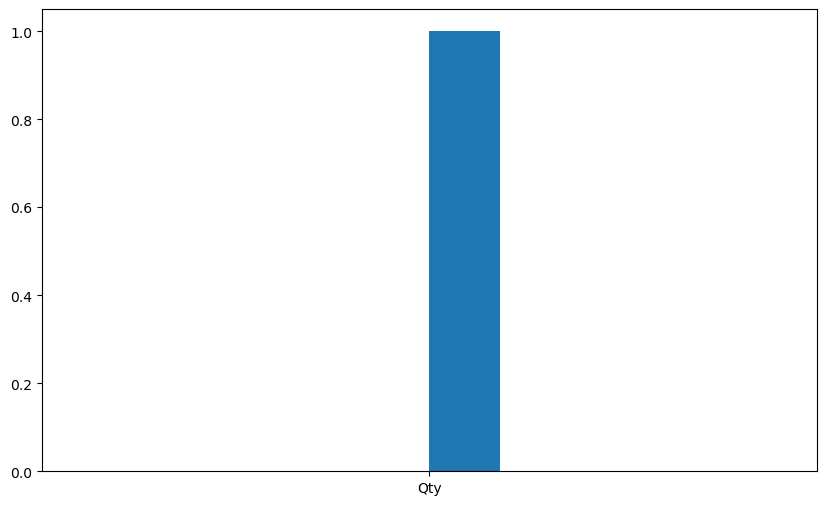

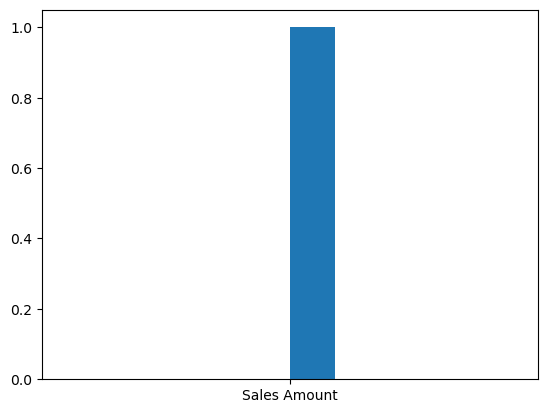

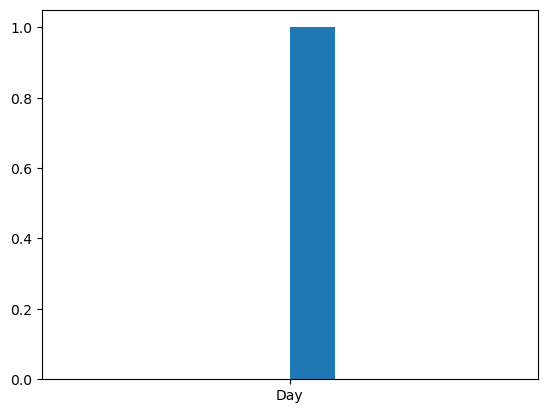

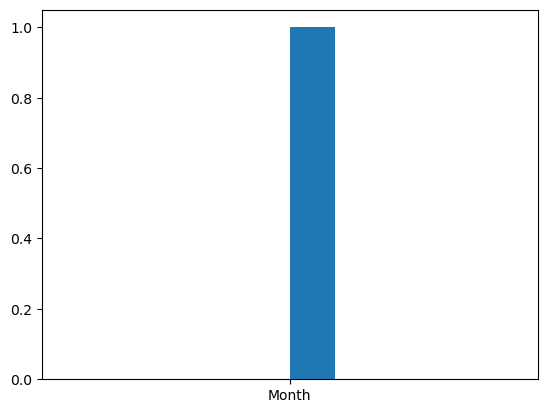

In [42]:
## Understanding the destribution of data
plt.figure(figsize=(10, 6))
for i in df.select_dtypes(include="number"):
    plt.hist(i)
    plt.show()

In [46]:
#checking the skeewness of the data
num_col=df.select_dtypes(include="number")
num_col.skew()

Qty             44.955200
Sales Amount    35.527706
Day              0.142720
Month           -0.408193
dtype: float64

In [47]:
#Checking correlation of the data
cor=num_col.corr()
cor

,Qty,Sales Amount,Day,Month
Qty,1.000000,0.508031,0.013251,0.003392
Sales Amount,0.508031,1.000000,0.031402,0.007759
Day,0.013251,0.031402,1.000000,0.002811
Month,0.003392,0.007759,0.002811,1.000000


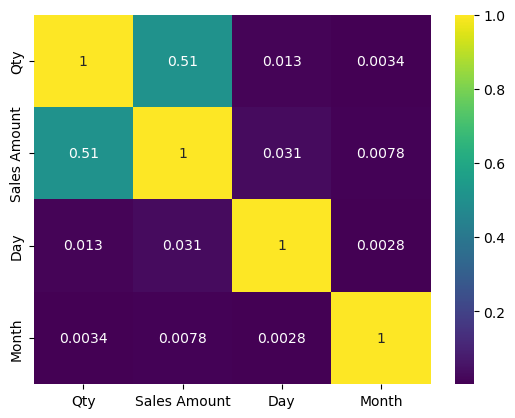

In [49]:
#heatmap for the correlation
plt.Figure(figsize=(10,6))
sns.heatmap(cor, annot=True, cmap="viridis")
plt.show()

In [51]:
## Categorical columns
cat_cols=df.select_dtypes(include="object")
cat_cols.columns


Index(['Customer Code', 'Customer name', 'Customer Category', 'Sales Rep',
       'Sales order no', 'Invoice no', 'Product Code', 'Product',
       'Product Category', 'Unit'],
      dtype='object')

C:\Users\SOOQ ELASER\AppData\Local\Temp\ipykernel_2124\3093766130.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


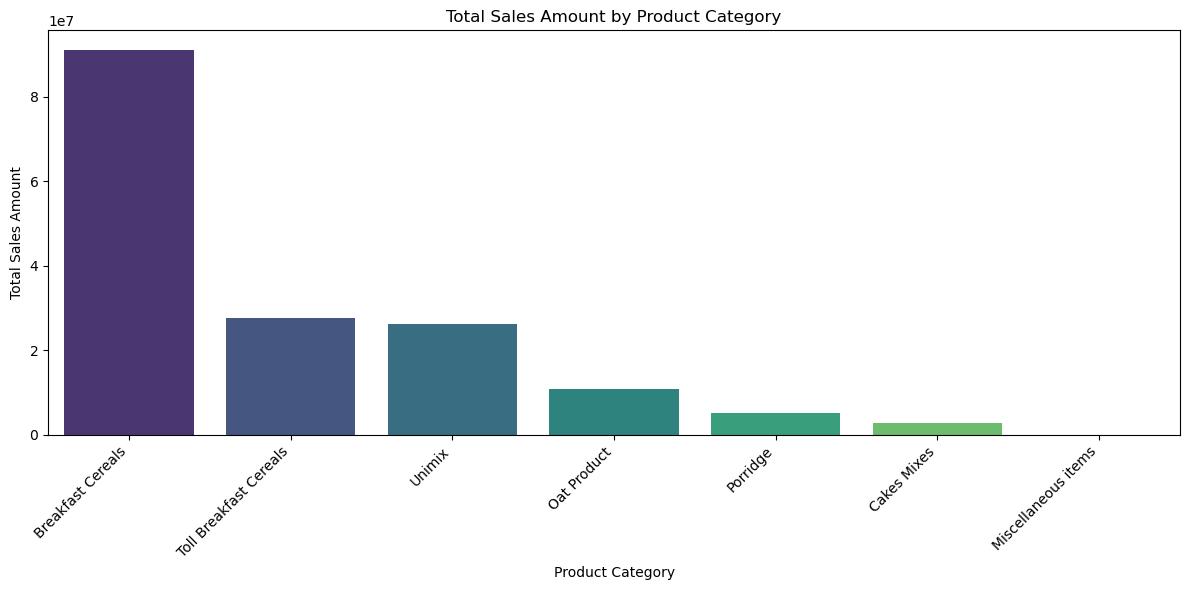

In [52]:
# Visualize Sales Amount by Product Category
plt.figure(figsize=(12, 6))
category_sales = df.groupby('Product Category')['Sales Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Product Category')
plt.tight_layout()
plt.show()

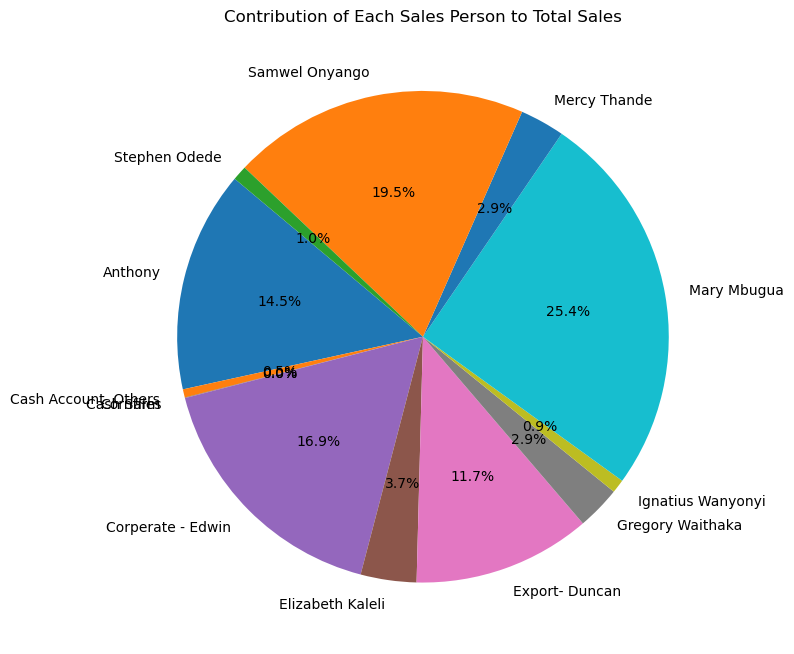

In [53]:
# Pie chart of each sales person's contribution to total sales
sales_by_rep = df.groupby('Sales Rep')['Sales Amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_rep, labels=sales_by_rep.index, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Sales Person to Total Sales')
plt.tight_layout()
plt.show()

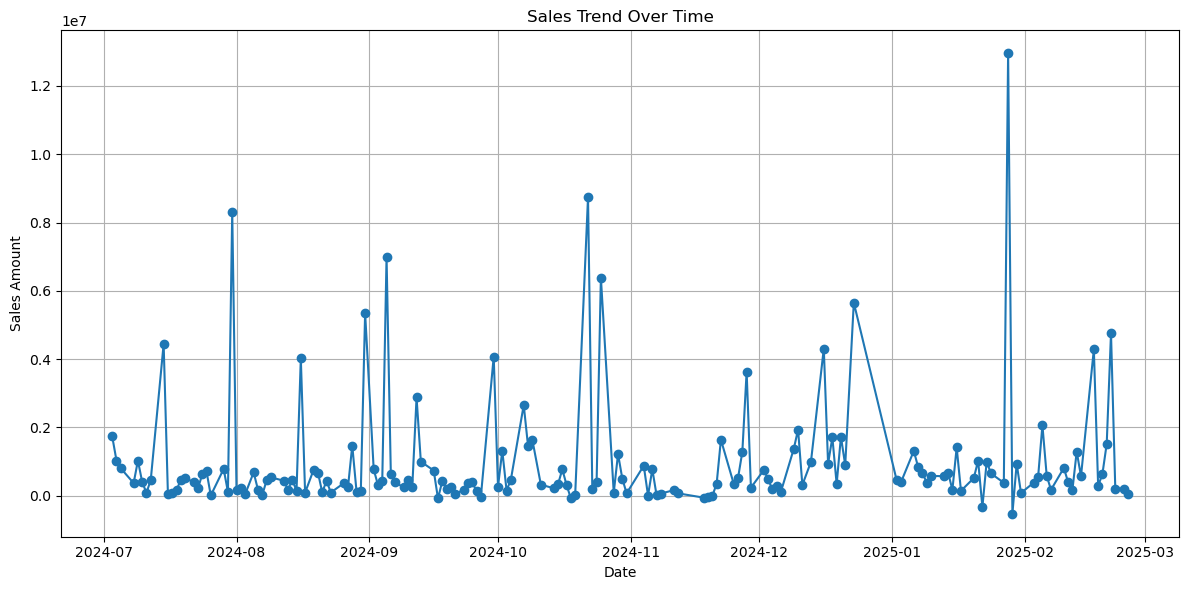

In [54]:
# Line chart to show the trend of sales over time
plt.figure(figsize=(12, 6))
sales_trend = df.groupby('Date')['Sales Amount'].sum().sort_index()
plt.plot(sales_trend.index, sales_trend.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

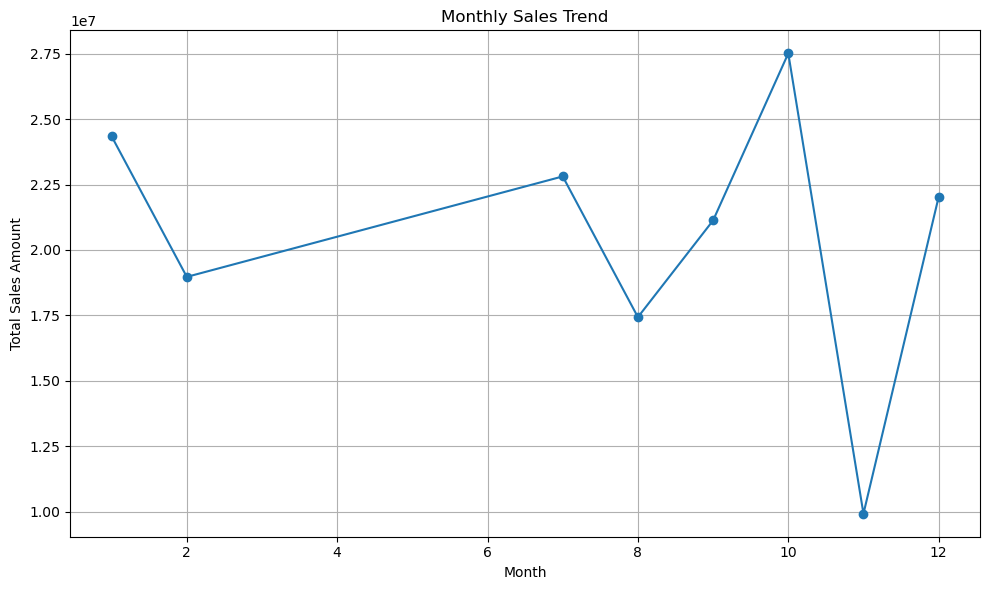

In [55]:
# Visualize the monthly trend of sales
monthly_sales = df.groupby('Month')['Sales Amount'].sum().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

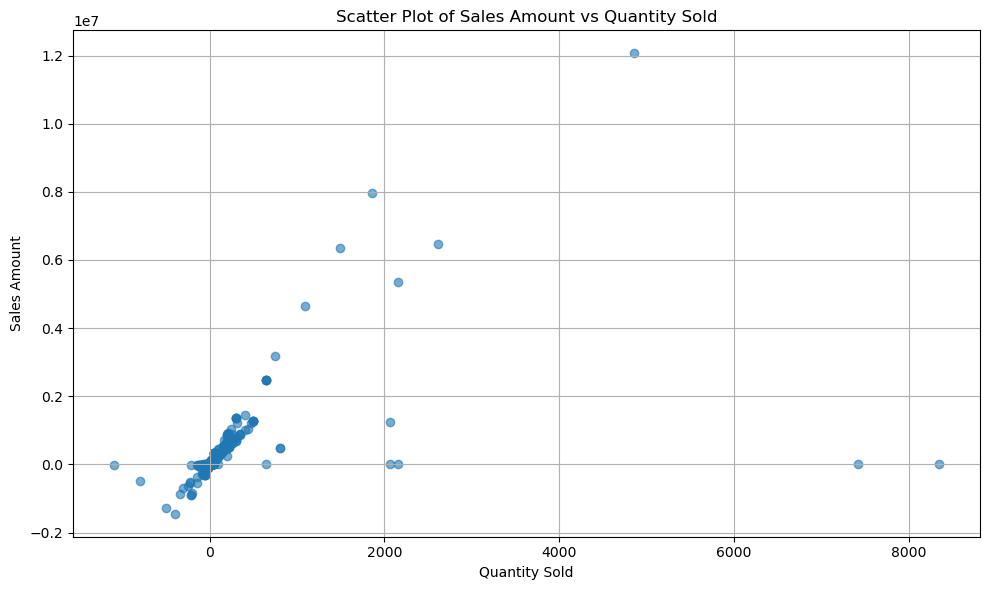

In [56]:
# Scatter plot of Sales Amount vs Quantity Sold
plt.figure(figsize=(10, 6))
plt.scatter(df['Qty'], df['Sales Amount'], alpha=0.6)
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.title('Scatter Plot of Sales Amount vs Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
# Additional analysis ideas for this sales dataset:

# 1. Top customers by sales amount
top_customers = df.groupby('Customer name')['Sales Amount'].sum().sort_values(ascending=False).head(5)
print("Top Customers by Sales Amount:")
print(top_customers)

# 2. Sales performance by Sales Rep
sales_rep_performance = df.groupby('Sales Rep')['Sales Amount'].sum().sort_values(ascending=False)
print("\nSales Performance by Sales Rep:")
print(sales_rep_performance)

# 3. Product returns or negative sales analysis
negative_sales = df[df['Sales Amount'] < 0]
print("\nEntries with Negative Sales Amount (Possible Returns):")
print(negative_sales[['Product', 'Qty', 'Sales Amount']].head())

# 4. Average sales per transaction
avg_sales_per_transaction = df['Sales Amount'].mean()
print(f"\nAverage Sales Amount per Transaction: ${avg_sales_per_transaction:,.2f}")

# 5. Sales by customer category
sales_by_category = df.groupby('Customer Category')['Sales Amount'].sum().sort_values(ascending=False)
print("\nSales by Customer Category:")
print(sales_by_category)

# 6. Seasonal trends (if data covers multiple years)
# Example: Compare monthly sales across years if 'Date' covers >1 year

# 7. Outlier detection in sales amount
outliers = df[df['Sales Amount'] > df['Sales Amount'].quantile(0.99)]
print("\nOutlier Transactions (Top 1% Sales Amount):")
print(outliers[['Product', 'Sales Amount']].head())

# 8. Sales distribution by unit type
sales_by_unit = df.groupby('Unit')['Sales Amount'].sum()
print("\nSales by Unit Type:")
print(sales_by_unit)

Top Customers by Sales Amount:
Customer name
NAIVAS LTD                               26905393.99
WEETABIX EAST AFRICA LIMITED             23151940.00
WANJOMO HOLDINGS LIMITED                 17402015.29
MAJID AL FUTTAIM HYPERMARKETS LIMITED    15527139.70
AFRICAN QUEEN NO. 1                      15389121.62
Name: Sales Amount, dtype: float64

Sales Performance by Sales Rep:
Sales Rep
Mary Mbugua             41727678.05
Samwel Onyango          32062856.35
Corperate - Edwin       27746460.00
Anthony                 23880287.27
Export- Duncan          19187297.05
Elizabeth Kaleli         6021297.70
Mercy Thande             4816863.91
Gregory Waithaka         4712539.55
Stephen Odede            1582981.92
Ignatius Wanyonyi        1463902.28
Cash Account  Others      883383.11
Cornfirm                   37785.30
Cash Sales                 28965.60
Name: Sales Amount, dtype: float64

Entries with Negative Sales Amount (Possible Returns):
                        Product  Qty  Sales Amount
0 

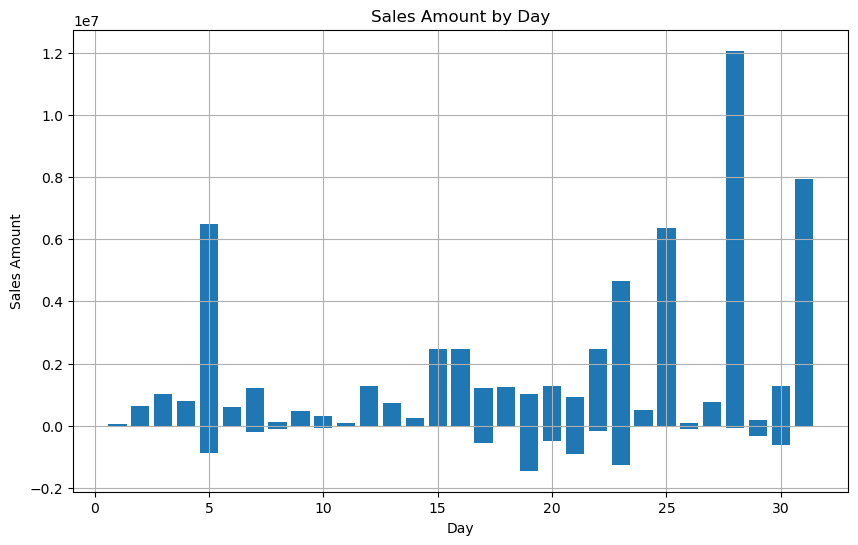

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(df['Day'], df['Sales Amount'])
plt.xlabel('Day')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Day')
plt.grid(True)
plt.show()

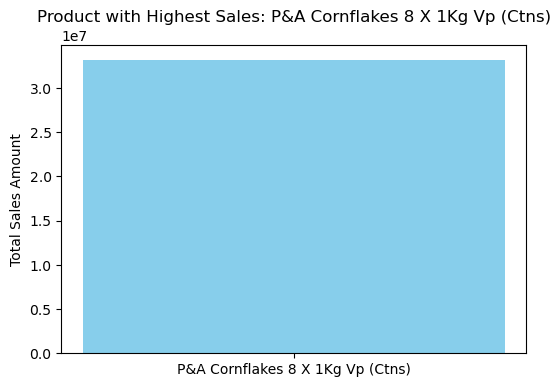

In [30]:
# Find the product with the highest total sales amount
top_product = df.groupby('Product')['Sales Amount'].sum().sort_values(ascending=False).head(1)
product_name = top_product.index[0]
sales_amount = top_product.values[0]

plt.figure(figsize=(6, 4))
plt.bar(product_name, sales_amount, color='skyblue')
plt.ylabel('Total Sales Amount')
plt.title(f'Product with Highest Sales: {product_name}')
plt.show()

In [31]:
# Print Total Revenue
print(f"Total Revenue: ${Total_Revenue:,.2f}")

# Best selling products with respective quantity sold
best_selling_products = df.groupby('Product')['Qty'].sum().sort_values(ascending=False)
print("\nBest Selling Products (by Quantity Sold):")
print(best_selling_products.head())

# Highest sales day
sales_by_day = df.groupby('Day')['Sales Amount'].sum()
highest_sales_day = sales_by_day.idxmax()
highest_sales_amount = sales_by_day.max()
print(f"\nHighest Sales Day: {highest_sales_day} with Sales Amount: ${highest_sales_amount:,.2f}")

Total Revenue: $164,152,298.09

Best Selling Products (by Quantity Sold):
Product
Oat Bran 1X1 Kgs                          17823
P&A Cornflakes 8 X 1Kg Vp (Ctns)          11473
Unimix P&A Csb 95Ms 12X2Kg With Sugar      9617
P&A Cornflakes 12 X 500G Vp (Ctns)         7650
Cornflakes Toll 1X14 Kg (Bag) Weetabix     5422
Name: Qty, dtype: int64

Highest Sales Day: 28 with Sales Amount: $18,154,261.47



### Findings from Sales Data Analysis

1. **Total Revenue & Quantity Sold**
    - The total revenue generated is **$164,152,298.09**.
    - The total quantity of products sold is **78,531 units**.

2. **Top Customers**
    - The highest sales were made to **NAIVAS LTD** and **WEETABIX EAST AFRICA LIMITED**, indicating strong business relationships with these key accounts.

3. **Best Selling Products**
    - The product with the highest quantity sold is **Oat Bran 1X1 Kgs** (17,823 units).
    - The product with the highest sales amount is **P&A Cornflakes 8 X 1Kg Vp (Ctns)** ($33,182,805.40).

4. **Sales by Product Category**
    - **Breakfast Cereals** dominate sales, followed by **Toll Breakfast Cereals** and **Unimix**.

5. **Sales Performance by Sales Rep**
    - **Mary Mbugua** and **Samwel Onyango** are the top-performing sales representatives.

6. **Monthly & Daily Trends**
    - The highest sales day is **Day 28** with sales amounting to **$18,154,261.47**.
    - Sales peak in **January, October, and December**, indicating possible seasonal trends.

7. **Negative Sales & Returns**
    - There are **1,348 entries** with negative sales amounts, suggesting product returns or corrections.

8. **Outlier Transactions**
    - The top 1% of transactions (103 entries) have exceptionally high sales amounts, mostly linked to bulk purchases by export customers.

9. **Sales by Customer Category**
    - **Key Accounts Customer** and **Corporate** categories contribute the most to total sales.

10. **Sales by Unit Type**
     - Most sales are in **Cartons** and **Bags**, reflecting bulk sales.

11. **Average Sales per Transaction**
     - The average sales amount per transaction is **$15,765.68**.

---

These insights can guide strategic decisions in product focus, customer relationship management, and sales team performance optimization.